In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv('Yerevan-Hotels.csv')

In [3]:
df.head()

,Hotel Names,Star Rating,Rating,Free Parking,Fitness Centre,Spa and Wellness Centre,Airport Shuttle,Staff,Facilities,Location,Comfort,Cleanliness,Price Per Day($)
0,Kenut Hostel,NaN,9.7,Yes,No,No,No,9.9,9.8,8.8,9.7,9.8,30.0
1,Kantar Hostel,NaN,9.3,Yes,No,No,Yes,9.7,9.4,9.7,9.2,9.2,15.0
2,Sweet Sleep hostel,NaN,9.5,Yes,No,No,No,9.8,9.5,8.9,9.4,9.5,20.0
3,Royal Boutique Hotel on Kievyan,NaN,7.4,Yes,No,No,Yes,8.1,7.3,8.3,7.5,7.8,26.0
4,Areg Hotel,3.0,8.2,No,No,No,No,9.1,8.0,8.3,8.1,8.2,29.0


In [4]:
df.describe()

,Star Rating,Rating,Staff,Facilities,Location,Comfort,Cleanliness,Price Per Day($)
count,79.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,120.000000
mean,3.772152,8.794783,9.261739,8.761739,8.913043,8.936522,8.936522,77.200000
std,0.678410,0.774692,0.534032,0.906757,0.794998,0.744492,0.773161,61.391203
min,2.000000,5.000000,7.500000,2.500000,7.000000,5.000000,5.000000,6.000000
25%,3.000000,8.450000,9.100000,8.400000,8.400000,8.700000,8.700000,40.000000
50%,4.000000,8.900000,9.400000,8.900000,8.900000,9.100000,9.100000,62.500000
75%,4.000000,9.300000,9.650000,9.300000,9.650000,9.400000,9.400000,110.000000
max,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,525.000000


In [5]:
df.shape

(120, 13)

In [6]:
df.isna().sum()


Hotel Names                 0
Star Rating                41
Rating                      5
Free Parking                0
Fitness Centre              0
Spa and Wellness Centre     0
Airport Shuttle             0
Staff                       5
Facilities                  5
Location                    5
Comfort                     5
Cleanliness                 5
Price Per Day($)            0
dtype: int64

In [7]:
for i in df.columns:
    if df[i].isna().sum() > 0:
        df[i].fillna(df[i].median(), inplace=True)

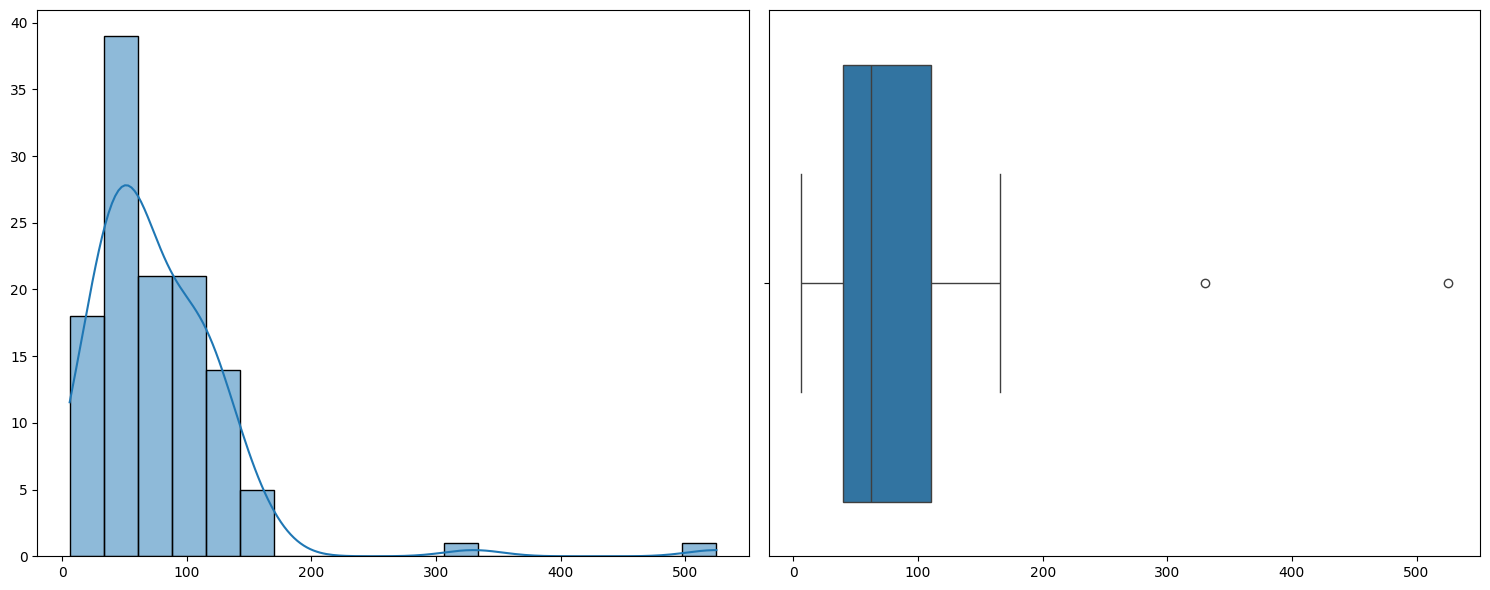

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

index = 0

sns.histplot(df, x="Price Per Day($)", ax=axes[index], kde=True)
axes[index].set_ylabel("")
axes[index].set_xlabel("")

index += 1

sns.boxplot(df, x="Price Per Day($)", ax=axes[index])
axes[index].set_ylabel("")
axes[index].set_xlabel("")

plt.tight_layout()
plt.show()

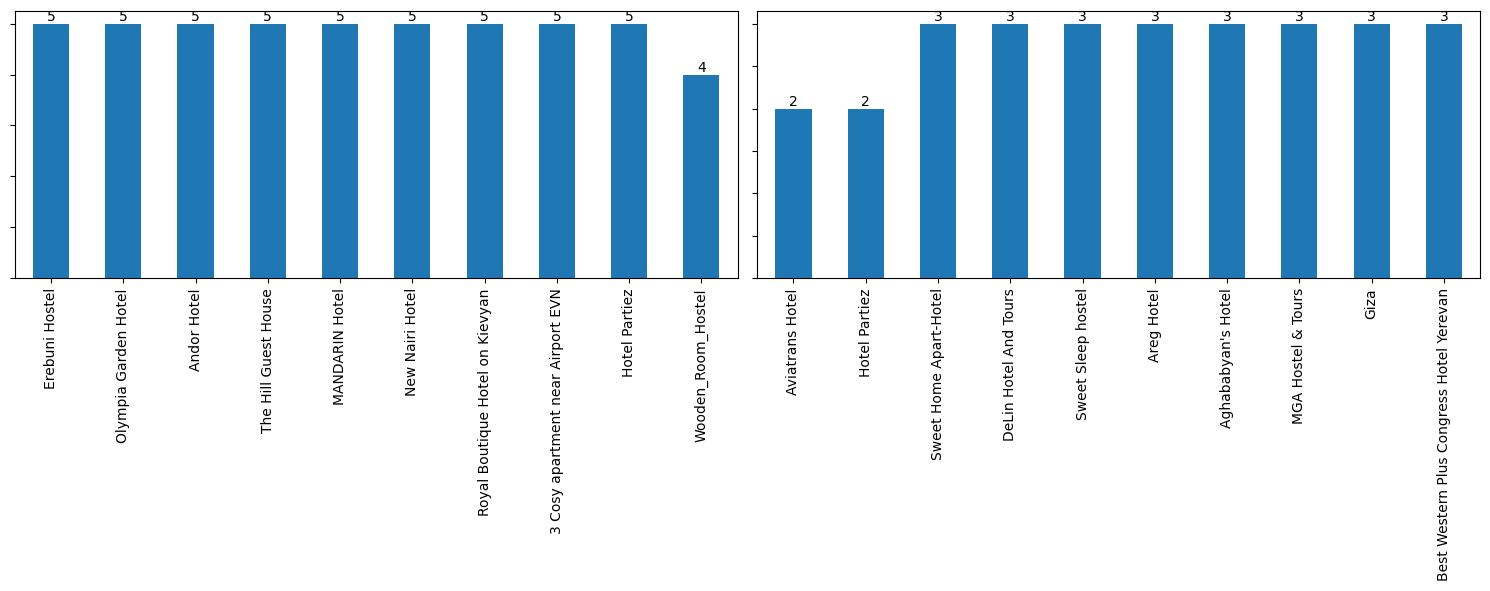

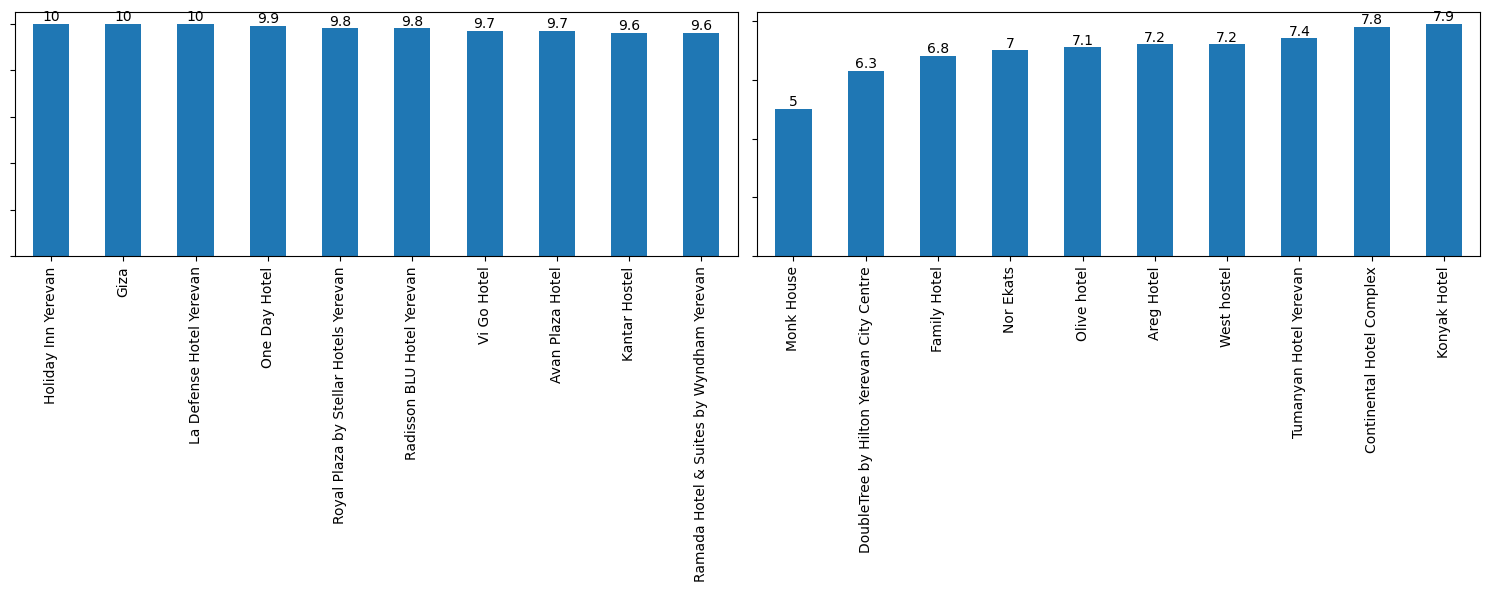

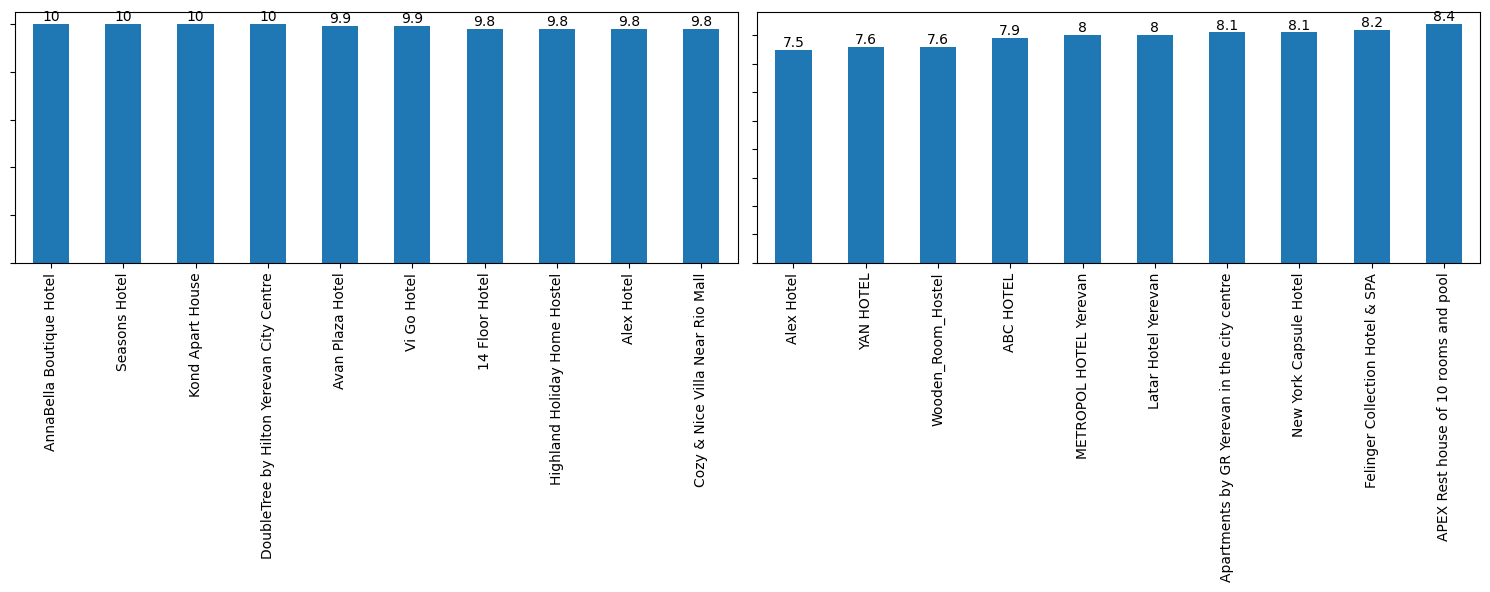

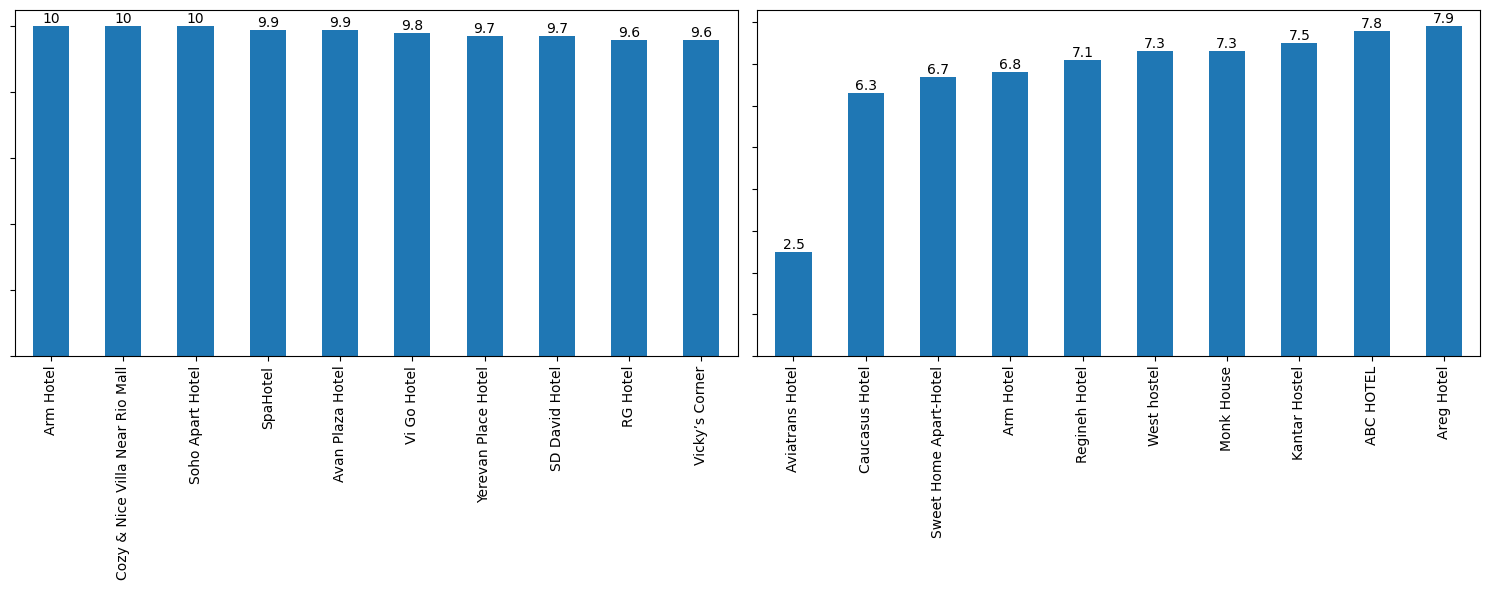

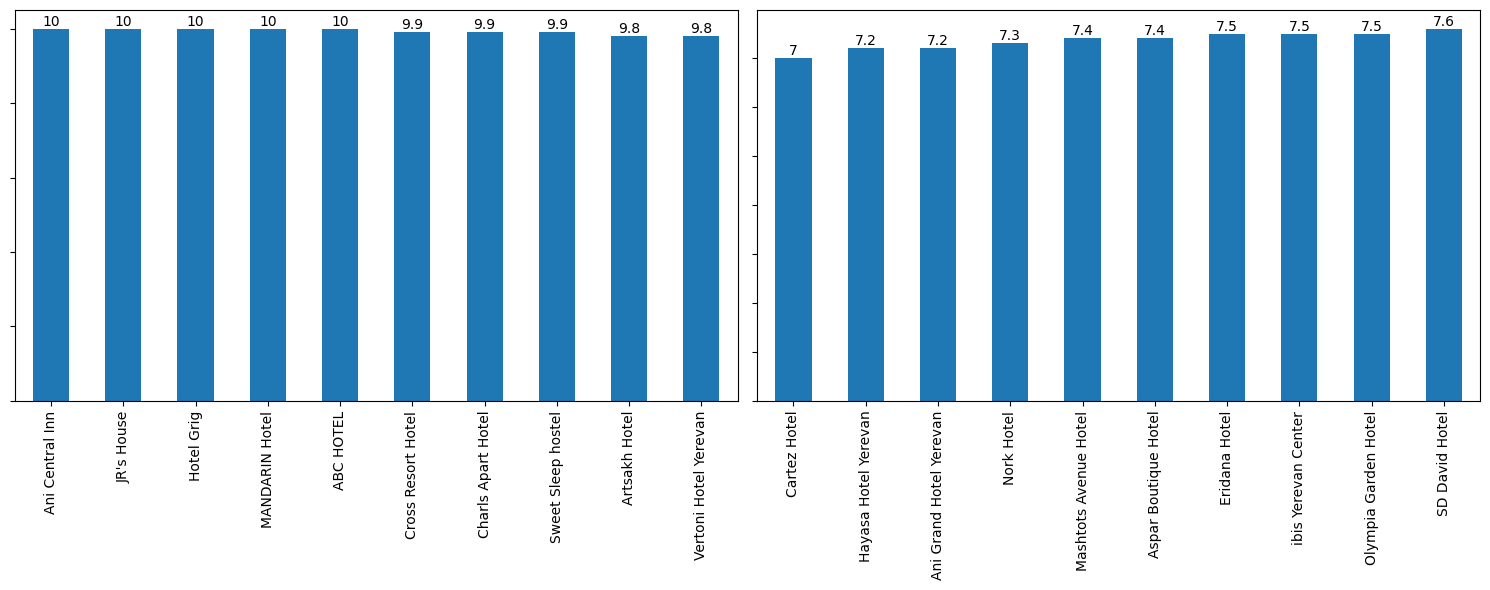

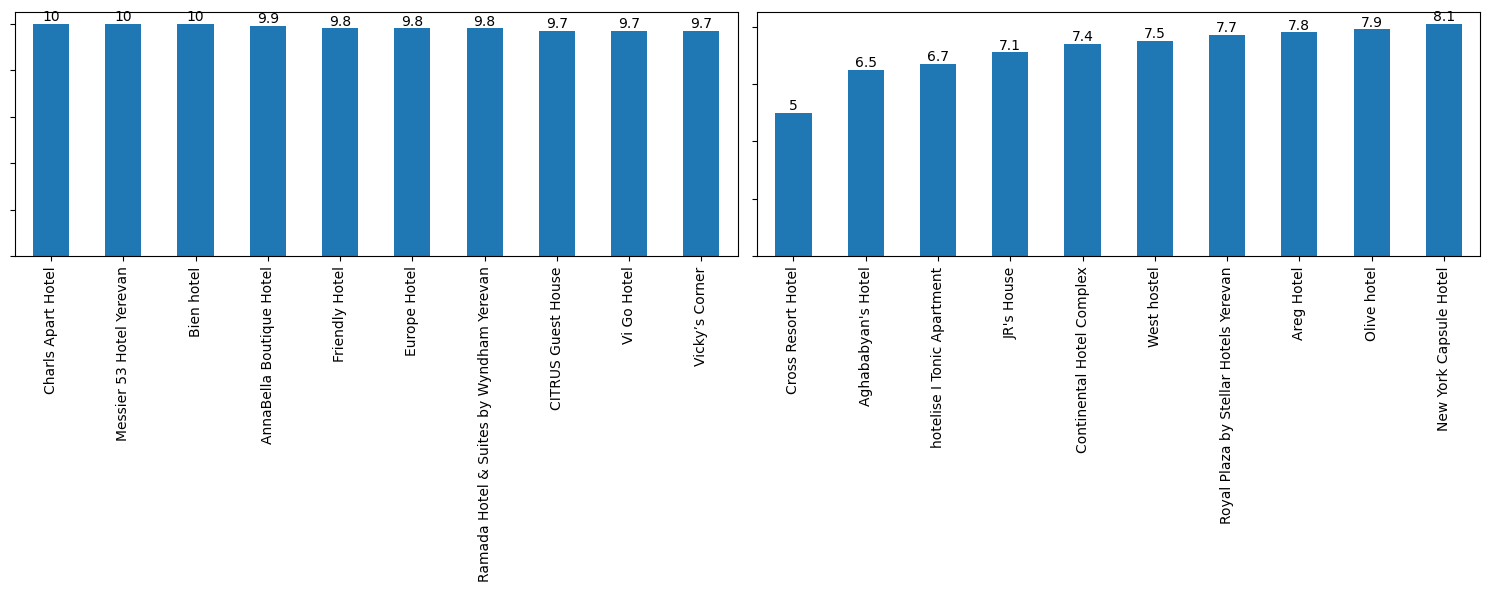

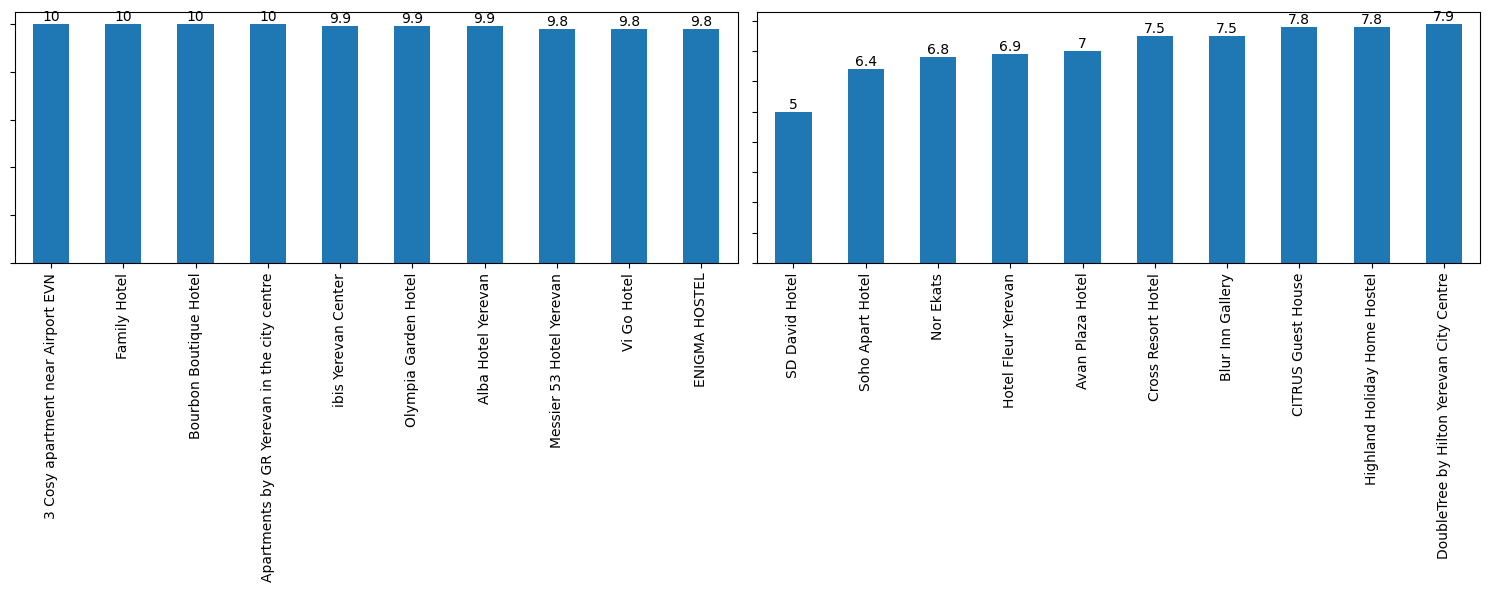

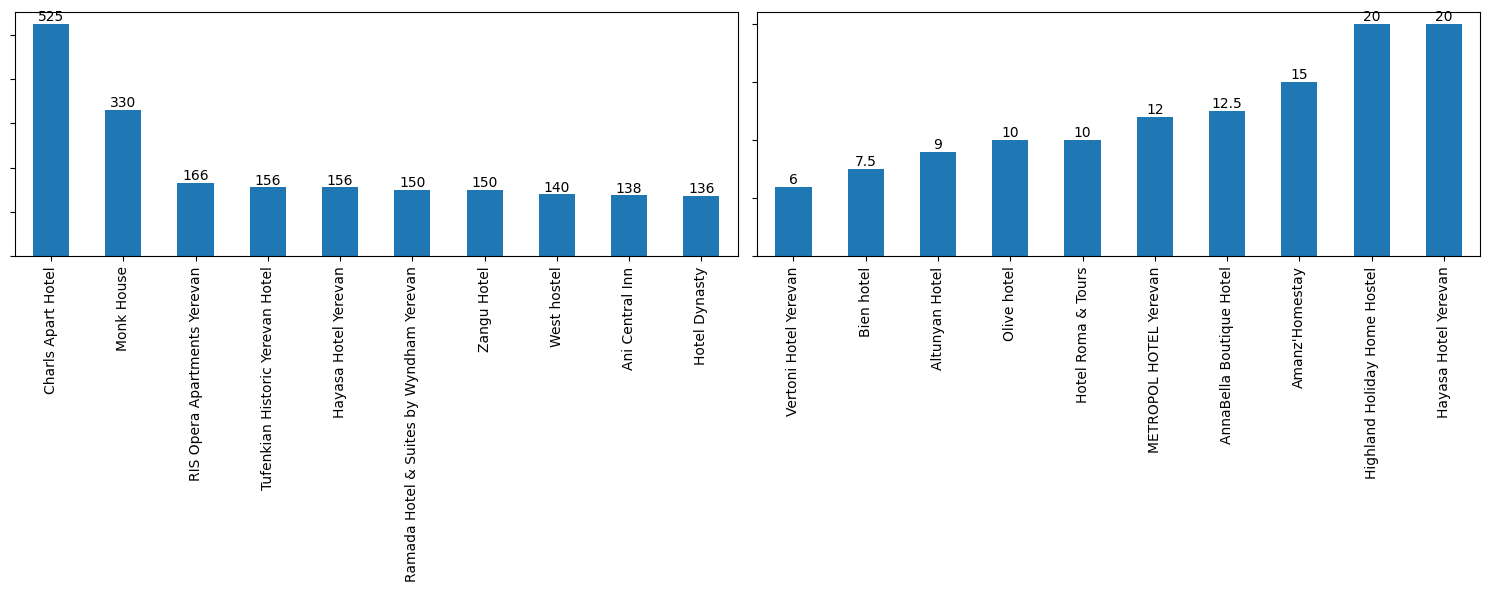

In [9]:
ratings = ["Star Rating", "Rating", "Staff", "Facilities",
       "Location", "Comfort", "Cleanliness", "Price Per Day($)"]

for i in ratings:
    display(HTML("<h2>{}</h2>".format(i)))
    fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

    index = 0


    df = df.sort_values(i, ascending=False)
    df[i][:10].plot(kind="bar", ax=axes[index])
    for container in axes[index].containers:
        axes[index].bar_label(container)
    labels = [df.iloc[j, 0] for j in df.index[:10]]
    axes[index].set_xticklabels(labels)
    axes[index].set_yticklabels(())
    axes[index].set_ylabel("")
    axes[index].set_xlabel("")

    index += 1

    df = df.sort_values(i, ascending=True)
    df[i][:10].plot(kind="bar", ax=axes[index])
    for container in axes[index].containers:
        axes[index].bar_label(container)
    labels = [df.iloc[j, 0] for j in df.index[:10]]
    axes[index].set_xticklabels(labels)
    axes[index].set_yticklabels(())
    axes[index].set_ylabel("")
    axes[index].set_xlabel("")

    plt.tight_layout()
    plt.show()

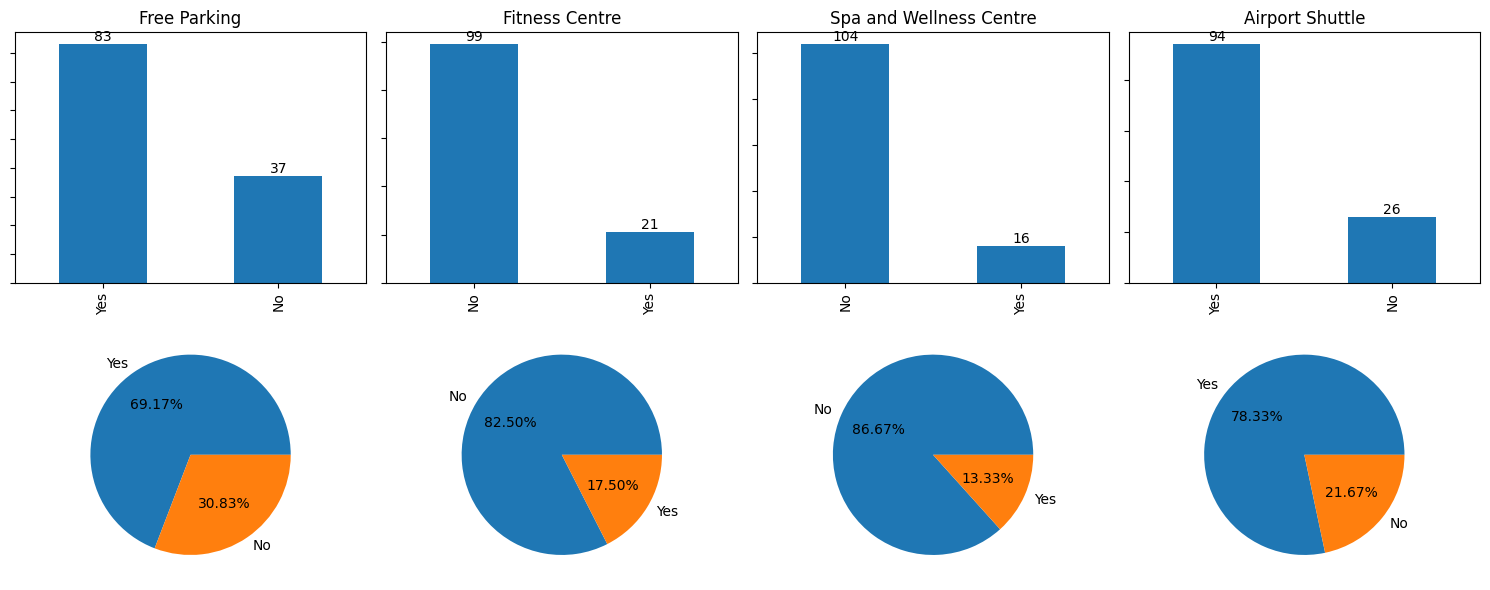

In [10]:
cats = ["Free Parking", "Fitness Centre", "Spa and Wellness Centre", "Airport Shuttle"]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))
for i, j in enumerate(cats):
    index = 0
    
    count = df[j].value_counts()
    count.plot(kind="bar", ax=axes[index][i])
    for container in axes[index][i].containers:
        axes[index][i].bar_label(container)
    axes[index][i].set_yticklabels(())
    axes[index][i].set_ylabel("")
    axes[index][i].set_xlabel("")
    axes[index][i].set_title(j)
    
    index += 1
    
    count.plot(kind="pie", ax=axes[index][i], autopct="%0.2f%%")
    axes[index][i].set_ylabel("")
    axes[index][i].set_xlabel("")
plt.tight_layout()
plt.show()

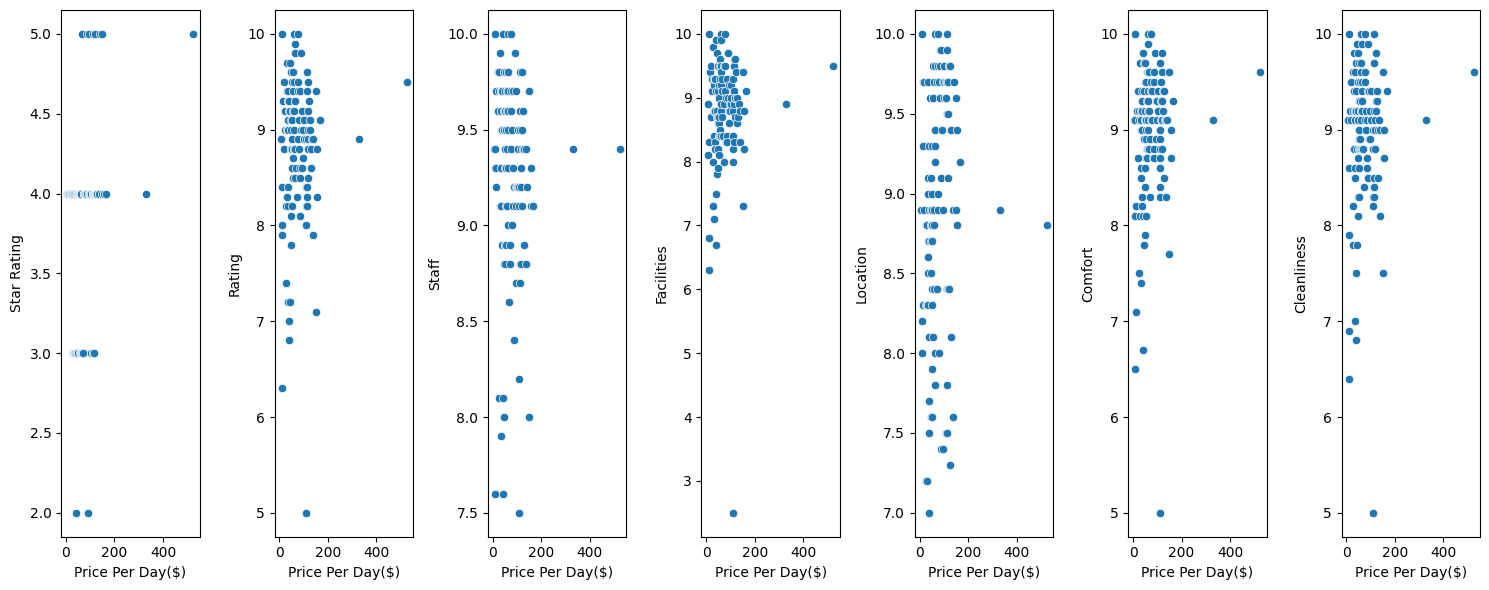

In [11]:
fig, axes = plt.subplots(ncols=7, figsize=(15, 6))

for i, j in enumerate(ratings[:-1]):
    sns.scatterplot(df, x=ratings[-1], y=j, ax=axes[i])
plt.tight_layout()
plt.show()

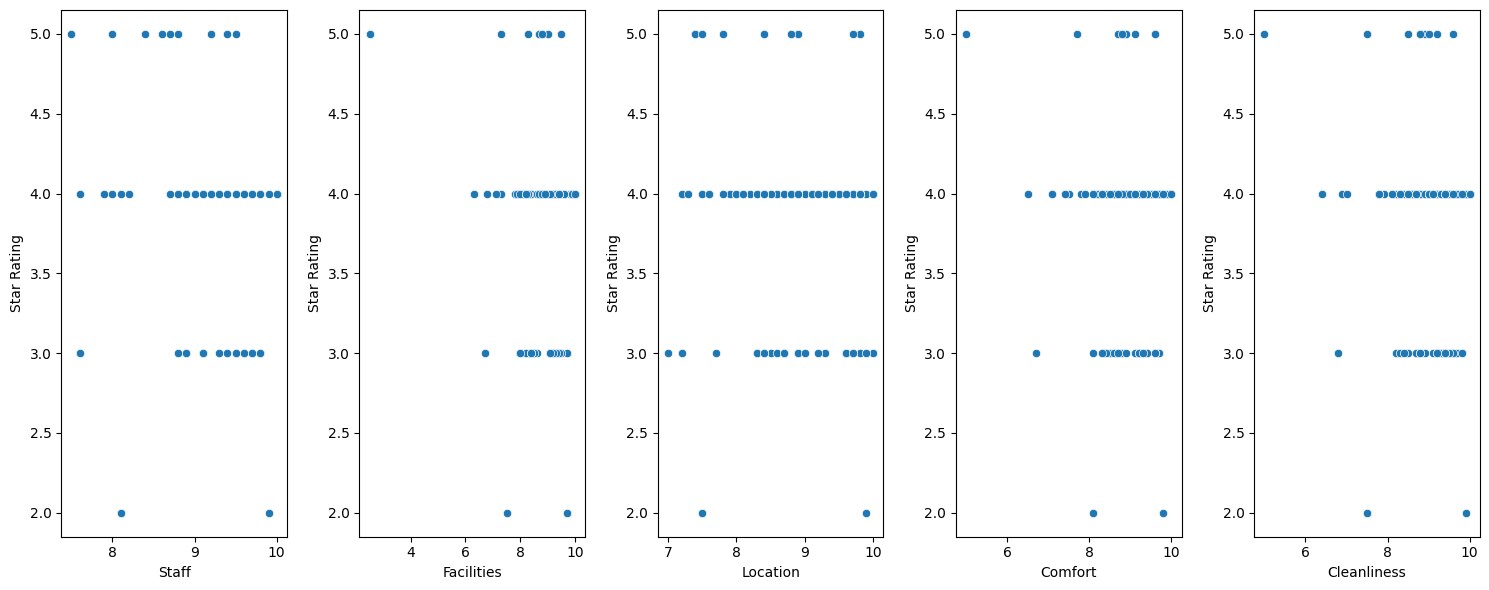

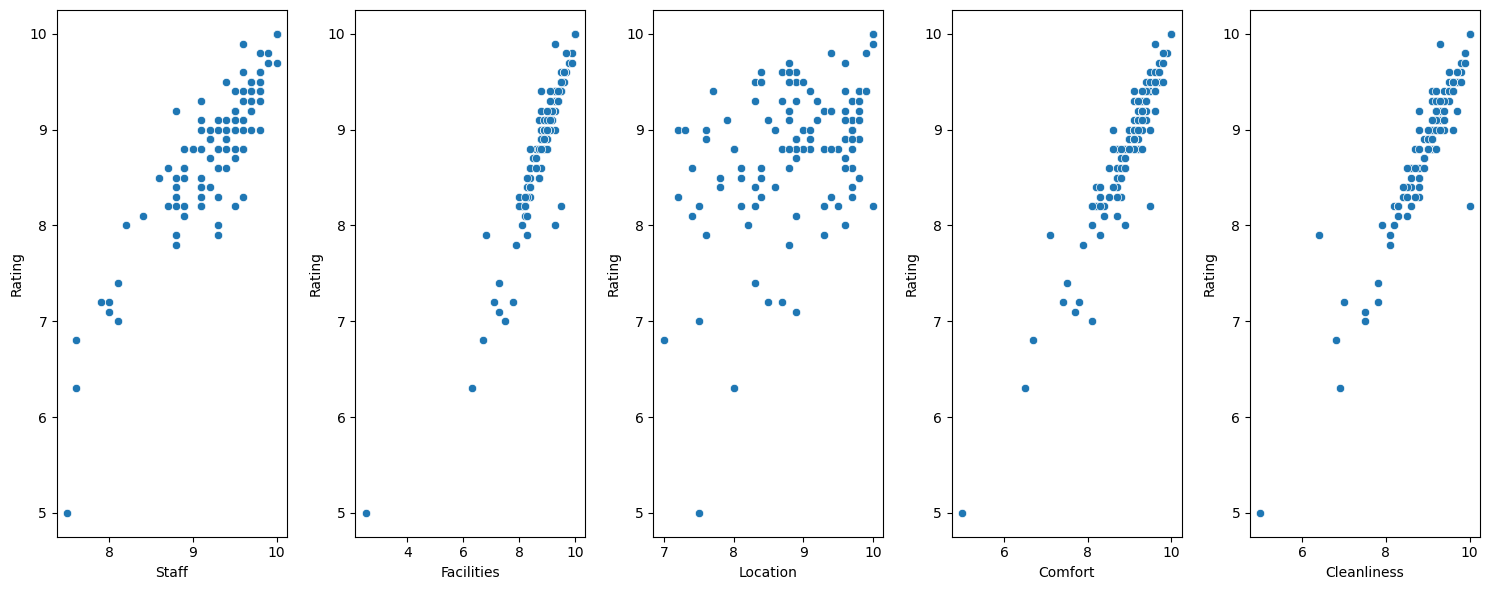

In [12]:
hotel_performance = ["Staff", "Facilities", "Location", "Comfort", "Cleanliness"]
ratings = ["Star Rating", "Rating"]

for i in ratings:
    display(HTML("<h2>{}</h2>".format(i)))
    fig, axes = plt.subplots(ncols=5, figsize=(15, 6))
    for j, k in enumerate(hotel_performance):
        sns.scatterplot(df, x=k, y=i, ax=axes[j])
    plt.tight_layout()
    plt.show()

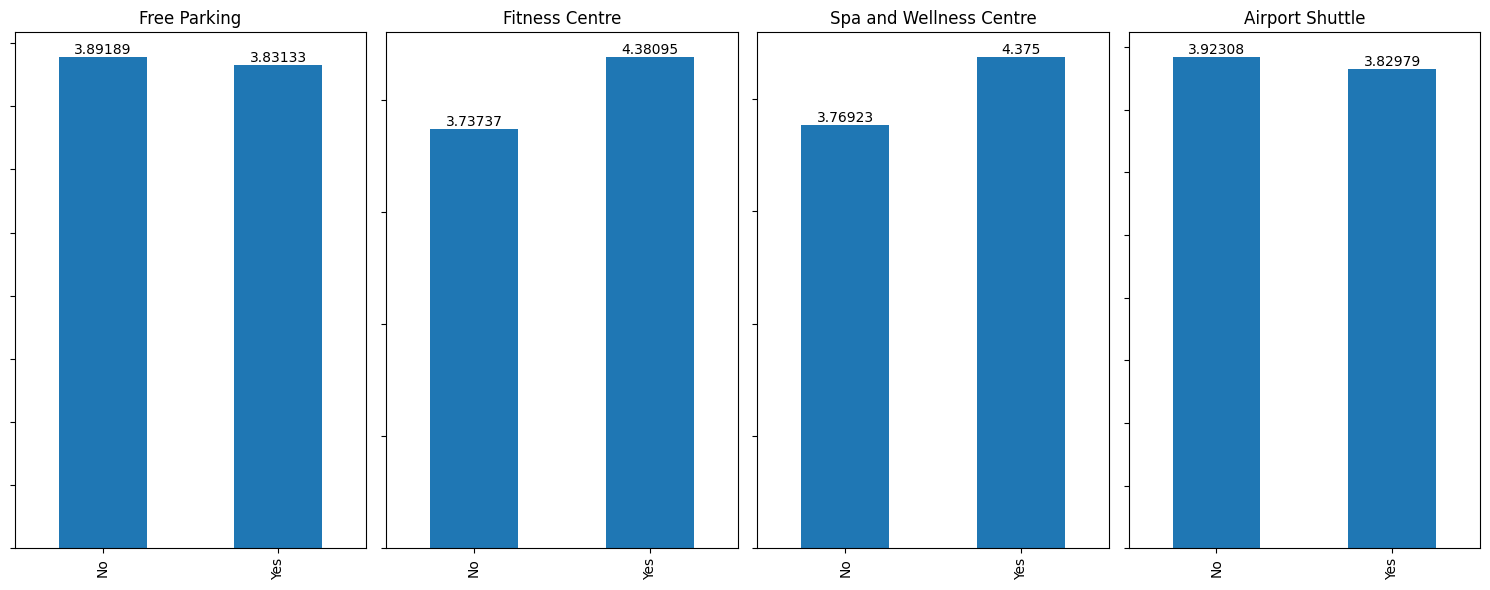

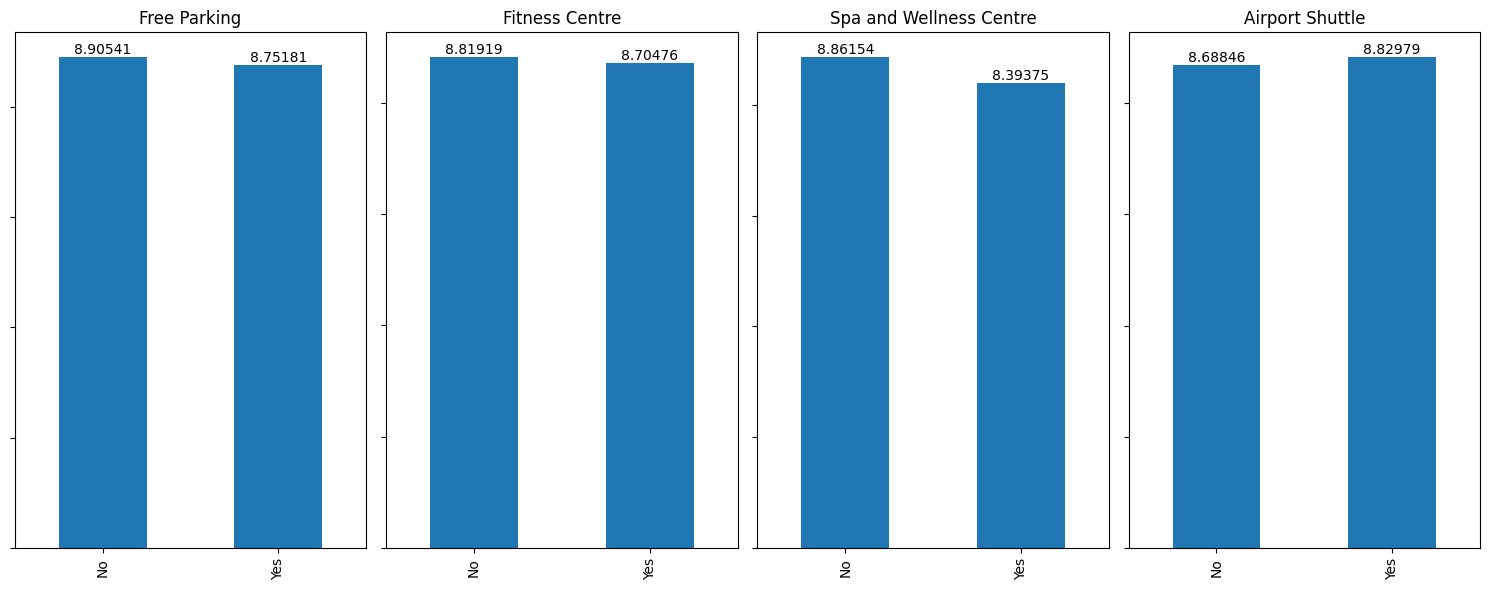

In [13]:
cats = ["Free Parking", "Fitness Centre", "Spa and Wellness Centre", "Airport Shuttle"]
for i in ratings:
    fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
    display(HTML("<h2>{}</h2>".format(i)))
    for j, k in enumerate(cats):
        grouped = df.groupby(k)
        mean = grouped[i].mean()
        mean.plot(kind="bar", ax=axes[j])
        for container in axes[j].containers:
            axes[j].bar_label(container)
        axes[j].set_yticklabels(())
        axes[j].set_ylabel("")
        axes[j].set_xlabel("")
        axes[j].set_title(k)
        
    plt.tight_layout()
    plt.show()

In [14]:
df["description"] = ""

for i in df.columns[1:-1]:
    df["description"] += i + ": " + df[i].astype(str) + ". "

df["description"] = df["description"].str.strip()

In [15]:
hotels = df[["Hotel Names", "description"]].copy()
hotels.reset_index(inplace=True)
hotels.drop("index", axis=1, inplace=True)

In [17]:
hotels["Hotel Names"] = hotels["Hotel Names"].str.lower()


In [18]:
cv = CountVectorizer(max_features=5000, stop_words='english')
vector = cv.fit_transform(hotels["description"]).toarray()

In [19]:
similarity = cosine_similarity(vector)


In [20]:
def recommended_hotels(title):
    name = title.lower()
    indices = hotels[hotels["Hotel Names"] == name].index[0]
    distances = similarity[indices]
    arr = sorted(list(enumerate(distances)), reverse = True, key=lambda x: x[1])[1:6]
    print("Recommended based on your search:")
    print()
    row = 1
    for j, i in enumerate(arr):
        title = hotels.loc[i[0], "Hotel Names"]
        desc = hotels.loc[i[0], "description"]
        print(title.upper())
        print(desc)
        print("\n")
        row += 1

In [21]:
print("You are watching the current option :".format(df.iloc[0, 0]))
recommended_hotels(df.iloc[0, 0])

You are watching the current option :
Recommended based on your search:

AMANZ'HOMESTAY
Star Rating: 4.0. Rating: 8.9. Free Parking: No. Fitness Centre: No. Spa and Wellness Centre: No. Airport Shuttle: No. Staff: 9.4. Facilities: 8.9. Location: 8.9. Comfort: 9.1. Cleanliness: 9.1. Price Per Day($): 7.5.


HIGHLAND HOLIDAY HOME HOSTEL
Star Rating: 4.0. Rating: 8.0. Free Parking: Yes. Fitness Centre: No. Spa and Wellness Centre: No. Airport Shuttle: No. Staff: 9.3. Facilities: 8.1. Location: 8.2. Comfort: 8.1. Cleanliness: 7.9. Price Per Day($): 9.0.


WOODEN_ROOM_HOSTEL
Star Rating: 4.0. Rating: 8.4. Free Parking: No. Fitness Centre: No. Spa and Wellness Centre: No. Airport Shuttle: No. Staff: 9.2. Facilities: 8.3. Location: 8.3. Comfort: 8.2. Cleanliness: 8.6. Price Per Day($): 12.0.


AREG HOTEL
Star Rating: 3.0. Rating: 8.2. Free Parking: No. Fitness Centre: No. Spa and Wellness Centre: No. Airport Shuttle: No. Staff: 9.1. Facilities: 8.0. Location: 8.3. Comfort: 8.1. Cleanliness: 8